In [1]:
import pandas as pd
import sqlalchemy
from sqlalchemy import create_engine, text
import pyodbc
import os

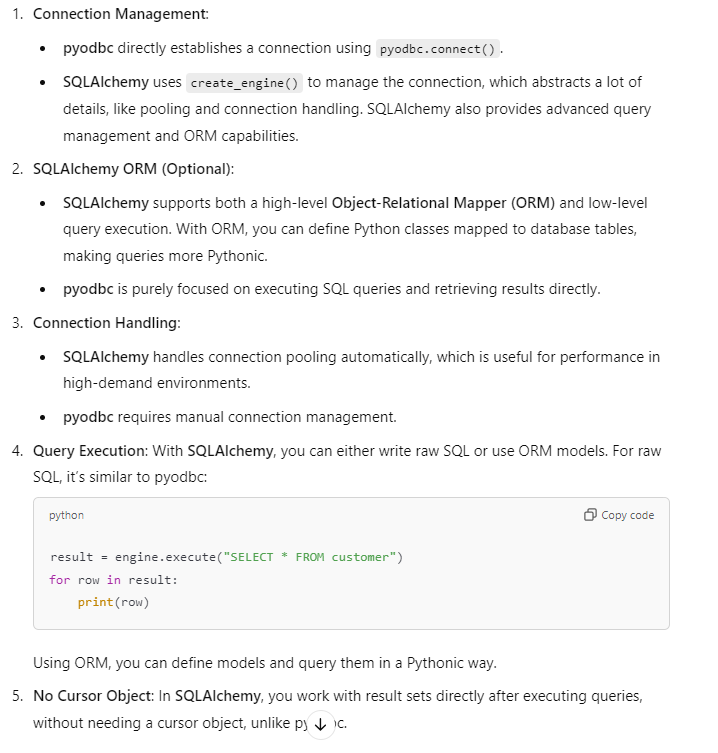

In [54]:
# # from sqlalchemy import create_engine
# server = "localhost\\SQLEXPRESS"
# database = "EcommerceDB"
# driver = "ODBC Driver 17 for SQL Server"
# connection_string = f"mssql+pyodbc:///?odbc_connect=DRIVER={{{driver}}};SERVER={server};DATABASE={database};Trusted_Connection=yes;"
# engine = create_engine(connection_string)

# Using Pyodbc to connect and create tables

In [ ]:
# local machine (localhost) and the instance is SQLEXPRESS
server = "localhost\\SQLEXPRESS"
database = "EcommerceDB"
driver = "ODBC Driver 17 for SQL Server"
connection_string = f'DRIVER={{{driver}}};SERVER={server};DATABASE={database};Trusted_Connection=yes;'
# Trusted_Connection=yes: Uses Windows authentication for the connection, meaning no username or password is required if the user running the script has the necessary permissions.

# Establish connection
connection = pyodbc.connect(connection_string)
# connection.cursor(): Returns a cursor object that allows you to execute SQL queries and fetch results.
cursor = connection.cursor()

# SQL to drop foreign key constraints and tables
sql_drop_create_tables = '''
    -- Drop foreign key constraints if they exist and the tables exist
    IF OBJECT_ID('olist_order_items_dataset', 'U') IS NOT NULL
    BEGIN
        IF OBJECT_ID('FK_order_items_order_id', 'F') IS NOT NULL
            ALTER TABLE olist_order_items_dataset DROP CONSTRAINT FK_order_items_order_id;

        IF OBJECT_ID('FK_order_items_product_id', 'F') IS NOT NULL
            ALTER TABLE olist_order_items_dataset DROP CONSTRAINT FK_order_items_product_id;

        IF OBJECT_ID('FK_order_items_seller_id', 'F') IS NOT NULL
            ALTER TABLE olist_order_items_dataset DROP CONSTRAINT FK_order_items_seller_id;
    END

    IF OBJECT_ID('olist_order_payments_dataset', 'U') IS NOT NULL
    BEGIN
        IF OBJECT_ID('FK_order_payments_order_id', 'F') IS NOT NULL
            ALTER TABLE olist_order_payments_dataset DROP CONSTRAINT FK_order_payments_order_id;
    END

    IF OBJECT_ID('olist_order_reviews_dataset', 'U') IS NOT NULL
    BEGIN
        IF OBJECT_ID('FK_order_reviews_order_id', 'F') IS NOT NULL
            ALTER TABLE olist_order_reviews_dataset DROP CONSTRAINT FK_order_reviews_order_id;
    END

    -- Drop tables if they exist, in reverse dependency order
    DROP TABLE IF EXISTS olist_order_reviews_dataset;
    DROP TABLE IF EXISTS olist_order_items_dataset;
    DROP TABLE IF EXISTS olist_order_payments_dataset;
    DROP TABLE IF EXISTS olist_sellers_dataset;
    DROP TABLE IF EXISTS olist_orders_dataset;
    DROP TABLE IF EXISTS olist_customers_dataset;
    DROP TABLE IF EXISTS olist_products_dataset;
    DROP TABLE IF EXISTS product_category_name_translation;
    DROP TABLE IF EXISTS olist_geolocation_dataset;


    -- Recreate tables in correct dependency order
    CREATE TABLE olist_customers_dataset (
        customer_id NVARCHAR(250) PRIMARY KEY,
        customer_unique_id NVARCHAR(250),
        customer_zip_code_prefix INT,
        customer_city NVARCHAR(250),
        customer_state NVARCHAR(250)
    );

    CREATE TABLE olist_orders_dataset (
        order_id NVARCHAR(250) PRIMARY KEY,
        customer_id NVARCHAR(250),
        order_status NVARCHAR(50),
        order_purchase_timestamp DATETIME,
        order_approved_at DATETIME,
        order_delivered_carrier_date DATETIME,
        order_delivered_customer_date DATETIME,
        order_estimated_delivery_date DATETIME,
        --FOREIGN KEY (customer_id) REFERENCES olist_customers_dataset(customer_id) ON DELETE SET NULL
    );

    CREATE TABLE product_category_name_translation (
        product_category_name NVARCHAR(250),
        product_category_name_english NVARCHAR(250),
        PRIMARY KEY (product_category_name)
    );

    CREATE TABLE olist_products_dataset (
        product_id NVARCHAR(250) PRIMARY KEY,
        product_category_name NVARCHAR(250),
        product_name_lenght INT,
        product_description_lenght INT,
        product_photos_qty INT,
        product_weight_g INT,
        product_length_cm INT,
        product_height_cm INT,
        product_width_cm INT,
        --FOREIGN KEY (product_category_name) REFERENCES product_category_name_translation(product_category_name) ON DELETE SET NULL
    );

    CREATE TABLE olist_sellers_dataset (
        seller_id NVARCHAR(250) PRIMARY KEY,
        seller_zip_code_prefix INT,
        seller_city NVARCHAR(250),
        seller_state NVARCHAR(250)
    );

    CREATE TABLE olist_order_items_dataset (
        order_id NVARCHAR(250),
        order_item_id INT,
        product_id NVARCHAR(250),
        seller_id NVARCHAR(250),
        shipping_limit_date DATETIME,
        price DECIMAL(10, 2),
        freight_value DECIMAL(10, 2),
        PRIMARY KEY (order_id, order_item_id),
        --FOREIGN KEY (order_id) REFERENCES olist_orders_dataset(order_id) ON DELETE SET NULL,
        --FOREIGN KEY (product_id) REFERENCES olist_products_dataset(product_id) ON DELETE SET NULL,
        --FOREIGN KEY (seller_id) REFERENCES olist_sellers_dataset(seller_id) ON DELETE SET NULL
    );

    CREATE TABLE olist_order_payments_dataset (
        order_id NVARCHAR(250),
        payment_sequential INT,
        payment_type NVARCHAR(250),
        payment_installments INT,
        payment_value DECIMAL(10, 2),
        PRIMARY KEY (order_id, payment_sequential),
        --FOREIGN KEY (order_id) REFERENCES olist_orders_dataset(order_id) ON DELETE SET NULL
    );

    CREATE TABLE olist_order_reviews_dataset (
        review_id NVARCHAR(250) PRIMARY KEY,
        order_id NVARCHAR(250),
        review_score INT,
        review_comment_title NVARCHAR(250),
        review_comment_message NVARCHAR(250),
        review_creation_date DATETIME,
        review_answer_timestamp DATETIME,
        --FOREIGN KEY (order_id) REFERENCES olist_orders_dataset(order_id) ON DELETE SET NULL
    );

    --CREATE TABLE olist_geolocation_dataset (
       -- geolocation_zip_code_prefix INT,
       -- geolocation_lat FLOAT,
       -- geolocation_lng FLOAT,
       -- geolocation_city NVARCHAR(250),
       -- geolocation_state NVARCHAR(250),
       -- PRIMARY KEY (geolocation_zip_code_prefix, geolocation_city),
    --);
'''

# Execute the query
cursor.execute(sql_drop_create_tables)
connection.commit()  # Commit the transaction to the database

# Close the cursor and connection
cursor.close()
connection.close()

In [56]:
# # local machine (localhost) and the instance is SQLEXPRESS
# server = "localhost\\SQLEXPRESS"
# database = "EcommerceDB"
# driver = "ODBC Driver 17 for SQL Server"
# connection_string = f'DRIVER={{{driver}}};SERVER={server};DATABASE={database};Trusted_Connection=yes;'
# # Trusted_Connection=yes: Uses Windows authentication for the connection, meaning no username or password is required if the user running the script has the necessary permissions.

# # Establish connection
# connection = pyodbc.connect(connection_string)
# # connection.cursor(): Returns a cursor object that allows you to execute SQL queries and fetch results.
# cursor = connection.cursor()
# # Execute the query
# cursor.execute(sql_query)
# connection.commit()  # Commit the transaction to the database

# # Close the cursor and connection
# cursor.close()
# connection.close()
#______________________________________________________________________________________________________

# # to read results from a query
# query = "select * from olist_products_dataset"
# cursor.execute(query)

# #fetches all rows from the result of the SQL query into a variable rows. This returns a list of tuples where each tuple represents a row 
# rows = cursor.fetchall()

# for row in rows:
#     print(row)

# df = pd.read_sql(query, connection)
# df.head()


### Creating dataframes

In [10]:
df_customers = pd.read_csv('D:\Data Engineering DEPI\Final Project\Ecommerce Dataset/olist_customers_dataset.csv')
df_sellers = pd.read_csv('D:\Data Engineering DEPI\Final Project\Ecommerce Dataset/olist_sellers_dataset.csv')
df_order_reviews= pd.read_csv('D:\Data Engineering DEPI\Final Project\Ecommerce Dataset/olist_order_reviews_dataset.csv')
df_order_items= pd.read_csv('D:\Data Engineering DEPI\Final Project\Ecommerce Dataset/olist_order_items_dataset.csv')
df_products= pd.read_csv('D:\Data Engineering DEPI\Final Project\Ecommerce Dataset/olist_products_dataset.csv')
#df_geolocation= pd.read_csv('D:\Data Engineering DEPI\Final Project\Ecommerce Dataset/olist_geolocation_dataset.csv')
df_category_name_translation= pd.read_csv('D:\Data Engineering DEPI\Final Project\Ecommerce Dataset/product_category_name_translation.csv')
df_orders = pd.read_csv('D:\Data Engineering DEPI\Final Project\Ecommerce Dataset/olist_orders_dataset.csv')
df_order_payments= pd.read_csv('D:\Data Engineering DEPI\Final Project\Ecommerce Dataset/olist_order_payments_dataset.csv')

In [11]:
df_category_name_translation.head(2)

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories


In [12]:
# creating pandas series
pd.Series(df_category_name_translation.product_category_name_english.values, index=df_category_name_translation.product_category_name).head(2)

product_category_name
beleza_saude                      health_beauty
informatica_acessorios    computers_accessories
dtype: object

In [13]:
# Create mapping dictionary from pandas series
mapping_dict = pd.Series(df_category_name_translation.product_category_name_english.values, index=df_category_name_translation.product_category_name).to_dict()
list(mapping_dict.items())[:4]

[('beleza_saude', 'health_beauty'),
 ('informatica_acessorios', 'computers_accessories'),
 ('automotivo', 'auto'),
 ('cama_mesa_banho', 'bed_bath_table')]

In [61]:
# Replace ProductCode with ProductName using map()
df_products['product_category_name_english'] = df_products['product_category_name'].map(mapping_dict).fillna(df_products['product_category_name'])

# Optionally, drop the original ProductCode column
df_products = df_products.drop('product_category_name', axis=1)

df_products.rename(columns={"product_category_name_english": "product_category_name"}, inplace= True)

display(df_products.head())

,product_id,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name
0,1e9e8ef04dbcff4541ed26657ea517e5,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art
2,96bd76ec8810374ed1b65e291975717f,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby
4,9dc1a7de274444849c219cff195d0b71,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares


In [62]:
display(df_products.shape)
display(df_products['product_id'].nunique())

display(df_sellers.shape)
display(df_sellers['seller_id'].nunique())

display(df_customers.shape)
display(df_customers['customer_id'].nunique())

(32951, 9)

32951

(3095, 4)

3095

(99441, 5)

99441

##### so the above tables have no duplicates, so when adding these as the dimensions in staging DW

In [63]:
# remove duplicates from reviews dataset
df_order_reviews = df_order_reviews.drop_duplicates(subset='review_id')

# Standardize city names by stripping whitespace and converting to lowercase
#df_geolocation['geolocation_city'] = df_geolocation['geolocation_city'].str.strip().str.lower()
df_customers['customer_city'] = df_customers['customer_city'].str.strip().str.lower()
df_sellers['seller_city'] = df_sellers['seller_city'].str.strip().str.lower()

# remove duplicates from reviews dataset
#df_geolocation = df_geolocation.drop_duplicates(subset=['geolocation_zip_code_prefix','geolocation_state'])

display(f'duplicates of reviews = {df_order_reviews.duplicated().sum()}')
display(f'duplicates of customers = {df_customers.duplicated().sum()}')
#display(f'duplicates of geolocation = {df_geolocation.duplicated().sum()}')

'duplicates of reviews = 0'

'duplicates of customers = 0'

### use sqlalchemy to move data from dataframes

In [64]:
# load data to sql
# use sqlalchemy
# Connection details
server = "localhost\\SQLEXPRESS"
database = "EcommerceDB"
driver = "ODBC Driver 17 for SQL Server"
connection_string = f"mssql+pyodbc:///?odbc_connect=DRIVER={{{driver}}};SERVER={server};DATABASE={database};Trusted_Connection=yes;"

# Create an SQLAlchemy engine
engine = create_engine(connection_string)

# Write DataFrame to SQL table
df_customers.to_sql(name="olist_customers_dataset", con=engine, if_exists="append", index=False)
df_sellers.to_sql(name="olist_sellers_dataset", con=engine, if_exists="append", index=False)
df_order_reviews.to_sql(name="olist_order_reviews_dataset", con=engine, if_exists="append", index=False)
df_order_items.to_sql(name="olist_order_items_dataset", con=engine, if_exists="append", index=False)
df_products.to_sql(name="olist_products_dataset", con=engine, if_exists="append", index=False)
#df_geolocation.to_sql(name="olist_geolocation_dataset", con=engine, if_exists="append", index=False)
df_category_name_translation.to_sql(name="product_category_name_translation", con=engine, if_exists="append", index=False)
df_orders.to_sql(name="olist_orders_dataset", con=engine, if_exists="append", index=False)
df_order_payments.to_sql(name="olist_order_payments_dataset", con=engine, if_exists="append", index=False)

393

#### Adding foreign keys

In [65]:
# Database connection parameters
server = "localhost\\SQLEXPRESS"
database = "EcommerceDB"
driver = "ODBC Driver 17 for SQL Server"
connection_string = f'DRIVER={{{driver}}};SERVER={server};DATABASE={database};Trusted_Connection=yes;'

# Establish connection
connection = pyodbc.connect(connection_string)
cursor = connection.cursor()

# SQL query to add foreign key constraints after tables are created
# SQL query to add foreign key constraints after tables are created
sql_add_foreign_keys = '''
    --orders
    ALTER TABLE olist_orders_dataset
    ADD CONSTRAINT FK_olist_orders_customer_id
    FOREIGN KEY (customer_id) REFERENCES olist_customers_dataset(customer_id);

    --order_reviews
    ALTER TABLE olist_order_reviews_dataset
    ADD CONSTRAINT FK_order_reviews_id
    FOREIGN KEY (order_id) REFERENCES olist_orders_dataset(order_id);

    --ALTER TABLE olist_products_dataset
    --ADD CONSTRAINT FK_product_category_name
    --FOREIGN KEY (product_category_name) REFERENCES product_category_name_translation(product_category_name);

    --order_items
    ALTER TABLE olist_order_items_dataset
    ADD CONSTRAINT FK_order_items_order_id
    FOREIGN KEY (order_id) REFERENCES olist_orders_dataset(order_id);

    ALTER TABLE olist_order_items_dataset
    ADD CONSTRAINT FK_order_items_product_id
    FOREIGN KEY (product_id) REFERENCES olist_products_dataset(product_id);

    ALTER TABLE olist_order_items_dataset
    ADD CONSTRAINT FK_order_items_seller_id
    FOREIGN KEY (seller_id) REFERENCES olist_sellers_dataset(seller_id);

    --order_payments
    ALTER TABLE olist_order_payments_dataset
    ADD CONSTRAINT FK_order_payments_order_id
    FOREIGN KEY (order_id) REFERENCES olist_orders_dataset(order_id);

    --customers
    --ALTER TABLE olist_customers_dataset
    --ADD CONSTRAINT FK_customer_zip_code_prefix
    --FOREIGN KEY (customer_zip_code_prefix, customer_state) REFERENCES olist_geolocation_dataset(geolocation_zip_code_prefix, geolocation_state);


    --sellers
    --ALTER TABLE olist_sellers_dataset
    --ADD CONSTRAINT FK_seller_zip_code_prefix
    --FOREIGN KEY (seller_zip_code_prefix, seller_state) REFERENCES olist_geolocation_dataset(geolocation_zip_code_prefix, geolocation_state);

'''

# Execute the query
cursor.execute(sql_add_foreign_keys)
connection.commit()  # Commit the transaction to the database

# Close the cursor and connection
cursor.close()
connection.close()

#### creating view to have all orders tables into one view for creating the DW

In [32]:
# Database connection parameters
server = "localhost\\SQLEXPRESS"
database = "EcommerceDB"
driver = "ODBC Driver 17 for SQL Server"
connection_string = f'DRIVER={{{driver}}};SERVER={server};DATABASE={database};Trusted_Connection=yes;'

# Establish connection
connection = pyodbc.connect(connection_string)
cursor = connection.cursor()

# Step 1: Drop the view if it exists
drop_view_query = '''
IF OBJECT_ID('orders_merged_data', 'V') IS NOT NULL
    DROP VIEW orders_merged_data;
'''

# Step 2: Define the create view query
create_view_query = '''
create view orders_merged_data as (

select 
    o.order_id,
    o.customer_id,
    i.product_id,
    i.seller_id,
    CAST(FORMAT(o.order_purchase_timestamp, 'yyyyMMdd') AS INT) AS date_key,  -- Format date to match Dim_Date
    o.order_status,
    o.order_purchase_timestamp,
    o.order_approved_at,
    o.order_delivered_carrier_date,
    o.order_delivered_customer_date,
    o.order_estimated_delivery_date,
    i.price AS order_price,
    i.freight_value AS order_freight_value,
    p.payment_sequential,
    --p.payment_type,
    p.payment_installments,
    p.payment_value,
    r.review_score

    from [dbo].[olist_orders_dataset] as o 
    left join [dbo].[olist_order_items_dataset] as i on o.order_id = i.order_id
    left join [dbo].[olist_order_payments_dataset] as p on o.order_id = p.order_id
    left join [dbo].[olist_order_reviews_dataset] as r on o.order_id = r.order_id
)
'''

# Execute the drop view query
cursor.execute(drop_view_query)

# Execute the create view query
cursor.execute(create_view_query)
connection.commit()  # Commit the transaction to the database

# Close the cursor and connection
cursor.close()
connection.close()






#     SELECT top 100
#     o.order_id,
#     o.customer_id,
#     i.product_id,
#     i.seller_id,
#     CAST(FORMAT(o.order_purchase_timestamp, 'yyyyMMdd') AS INT) AS date_key,
#     o.order_status,
#     o.order_purchase_timestamp,
#     o.order_approved_at,
#     o.order_delivered_carrier_date,
#     o.order_delivered_customer_date,
#     o.order_estimated_delivery_date,
#     SUM(i.price) AS order_price,
#     SUM(i.freight_value) AS order_freight_value,
#     MAX(p.payment_sequential) AS payment_sequential,  -- Choose an aggregation
#     STRING_AGG(p.payment_type, ',') AS payment_type,   -- Or another aggregation as needed
#     SUM(p.payment_installments) AS payment_installments,
#     SUM(p.payment_value) AS payment_value,
#     AVG(r.review_score) AS review_score

# FROM [dbo].[olist_orders_dataset] AS o 
# LEFT JOIN [dbo].[olist_order_items_dataset] AS i ON o.order_id = i.order_id
# LEFT JOIN [dbo].[olist_order_payments_dataset] AS p ON o.order_id = p.order_id
# LEFT JOIN [dbo].[olist_order_reviews_dataset] AS r ON o.order_id = r.order_id
# GROUP BY o.order_id, o.customer_id, i.product_id, i.seller_id, 
#          o.order_status, o.order_purchase_timestamp, 
#          o.order_approved_at, o.order_delivered_carrier_date, 
#          o.order_delivered_customer_date, o.order_estimated_delivery_date

# table instead of view

In [5]:
# Database connection parameters
server = "localhost\\SQLEXPRESS"
database = "EcommerceDB"
driver = "ODBC Driver 17 for SQL Server"
connection_string = f'DRIVER={{{driver}}};SERVER={server};DATABASE={database};Trusted_Connection=yes;'

# Establish connection
connection = pyodbc.connect(connection_string)
cursor = connection.cursor()

# Step 1: Drop the table if it exists
drop_table_query = '''
IF OBJECT_ID('orders_merged_data_tbl', 'U') IS NOT NULL
    DROP TABLE orders_merged_data_tbl;
'''

# Step 2: Create the table with the appropriate structure
create_table_query = '''
CREATE TABLE orders_merged_data_tbl (
    order_id NVARCHAR(250),
    customer_id NVARCHAR(250),
    product_id NVARCHAR(250),
    seller_id NVARCHAR(250),
    date_key INT,
    order_status NVARCHAR(50),
    order_purchase_timestamp DATETIME,
    order_approved_at DATETIME,
    order_delivered_carrier_date DATETIME,
    order_delivered_customer_date DATETIME,
    order_estimated_delivery_date DATETIME,
    order_price DECIMAL(10, 2),
    order_freight_value DECIMAL(10, 2),
    payment_sequential INT,
    payment_type NVARCHAR(MAX),
    payment_installments INT,
    payment_value DECIMAL(10, 2),
    review_score FLOAT
);
'''

# Step 3: Define the insert query with aggregations
insert_data_query = '''
INSERT INTO orders_merged_data_tbl
SELECT 
    o.order_id,
    o.customer_id,
    i.product_id,
    i.seller_id,
    CAST(FORMAT(o.order_purchase_timestamp, 'yyyyMMdd') AS INT) AS date_key,
    o.order_status,
    o.order_purchase_timestamp,
    o.order_approved_at,
    o.order_delivered_carrier_date,
    o.order_delivered_customer_date,
    o.order_estimated_delivery_date,
    SUM(i.price) AS order_price,
    SUM(i.freight_value) AS order_freight_value,
    MAX(p.payment_sequential) AS payment_sequential,
    STRING_AGG(p.payment_type, ',') AS payment_type,
    SUM(p.payment_installments) AS payment_installments,
    SUM(p.payment_value) AS payment_value,
    AVG(r.review_score) AS review_score
FROM [dbo].[olist_orders_dataset] AS o 
LEFT JOIN [dbo].[olist_order_items_dataset] AS i ON o.order_id = i.order_id
LEFT JOIN [dbo].[olist_order_payments_dataset] AS p ON o.order_id = p.order_id
LEFT JOIN [dbo].[olist_order_reviews_dataset] AS r ON o.order_id = r.order_id
GROUP BY o.order_id, o.customer_id, i.product_id, i.seller_id, 
         o.order_status, o.order_purchase_timestamp, 
         o.order_approved_at, o.order_delivered_carrier_date, 
         o.order_delivered_customer_date, o.order_estimated_delivery_date
'''

# Execute the drop table query
cursor.execute(drop_table_query)

# Execute the create table query
cursor.execute(create_table_query)

# Execute the insert data query
cursor.execute(insert_data_query)
connection.commit()  # Commit the transaction to the database

# Close the cursor and connection
cursor.close()
connection.close()

# Staging Datawarehouse

In [31]:
# Database connection parameters
server = "localhost\\SQLEXPRESS"
database = "Ecommerce_Staging_DW"
driver = "ODBC Driver 17 for SQL Server"
connection_string = f'DRIVER={{{driver}}};SERVER={server};DATABASE={database};Trusted_Connection=yes;'

# Establish connection
connection = pyodbc.connect(connection_string)
cursor = connection.cursor()

# SQL query to add foreign key constraints after tables are created
# SQL query to add foreign key constraints after tables are created
sql_add_foreign_keys = '''
-- Drop tables if they exist to avoid conflicts
DROP TABLE IF EXISTS Fact_Order;
DROP TABLE IF EXISTS Dim_Customer;
DROP TABLE IF EXISTS Dim_Product;
DROP TABLE IF EXISTS Dim_Seller;
DROP TABLE IF EXISTS Dim_Date;
DROP TABLE IF EXISTS fake_Fact_Order;


-- Dimension Tables Creation


-- Dim_Customer
CREATE TABLE Dim_Customer (
    customer_id NVARCHAR(250) PRIMARY KEY,
    customer_city NVARCHAR(250),
    customer_state NVARCHAR(250)
);

-- Dim_Product
CREATE TABLE Dim_Product (
    product_id NVARCHAR(250) PRIMARY KEY,
    product_category_name NVARCHAR(250),
    product_weight_g INT,
    product_length_cm INT,
    product_height_cm INT,
    product_width_cm INT
);

-- Dim_Seller
CREATE TABLE Dim_Seller (
    seller_id NVARCHAR(250) PRIMARY KEY,
    seller_city NVARCHAR(250),
    seller_state NVARCHAR(250)
);

-- Fact Table Creation
-- Fact_Order
CREATE TABLE Fact_Order (
    primary_order_id INT IDENTITY(1,1) PRIMARY KEY,          -- Surrogate key, auto-incrementing
    order_id NVARCHAR(250) NULL,                      -- Original order ID (can have duplicates)
    customer_id NVARCHAR(250) NULL,                        -- Matches `olist_customers_dataset` customer_id
    product_id NVARCHAR(250) NULL,                         -- Matches `olist_products_dataset` product_id
    seller_id NVARCHAR(250) NULL,                          -- Matches `olist_sellers_dataset` seller_id
    date_key INT NULL,                                     -- Assuming an integer key for date table joins
    order_status NVARCHAR(50) NULL,                        -- Adjusted to match `olist_orders_dataset` order_status
    order_purchase_date DATETIME NULL,                     -- Adjusted to match `olist_orders_dataset` order_purchase_timestamp
    order_approved_at DATETIME NULL,                       -- Matches `olist_orders_dataset` order_approved_at
    order_delivered_carrier_date DATETIME NULL,            -- Matches `olist_orders_dataset` order_delivered_carrier_date
    order_delivered_customer_date DATETIME NULL,           -- Matches `olist_orders_dataset` order_delivered_customer_date
    order_estimated_delivery_date DATETIME NULL,           -- Matches `olist_orders_dataset` order_estimated_delivery_date
    order_price DECIMAL(10, 2) NULL,                       -- Matches `olist_order_items_dataset` price
    order_freight_value DECIMAL(10, 2) NULL,               -- Matches `olist_order_items_dataset` freight_value
    payment_sequential INT NULL,                           -- Matches `olist_order_payments_dataset` payment_sequential
    --payment_type NVARCHAR(250) NULL,                        -- Adjusted to match `olist_order_payments_dataset` payment_type
    payment_installments INT NULL,                         -- Matches `olist_order_payments_dataset` payment_installments
    payment_value DECIMAL(10, 2) NULL,                     -- Matches `olist_order_payments_dataset` payment_value
    review_score INT NULL 

);


-- fake Fact Table Creation
-- fake Fact_Order
CREATE TABLE fake_Fact_Order (
    --primary_order_id INT IDENTITY(1,1) PRIMARY KEY,          -- Surrogate key, auto-incrementing
    order_id NVARCHAR(250) PRIMARY KEY,                      -- Original order ID (can have duplicates)
    customer_id NVARCHAR(250) NULL,                        -- Matches `olist_customers_dataset` customer_id
    product_id NVARCHAR(250) NULL,                         -- Matches `olist_products_dataset` product_id
    seller_id NVARCHAR(250) NULL,                          -- Matches `olist_sellers_dataset` seller_id
    date_key INT NULL,                                     -- Assuming an integer key for date table joins
    order_status NVARCHAR(50) NULL,                        -- Adjusted to match `olist_orders_dataset` order_status
    
    order_price DECIMAL(10, 2) NULL,                       -- Matches `olist_order_items_dataset` price
    order_freight_value DECIMAL(10, 2) NULL,               -- Matches `olist_order_items_dataset` freight_value
    payment_sequential INT NULL,                           -- Matches `olist_order_payments_dataset` payment_sequential
    payment_type NVARCHAR(50) NULL,                        -- Adjusted to match `olist_order_payments_dataset` payment_type
    payment_installments INT NULL,                         -- Matches `olist_order_payments_dataset` payment_installments
    payment_value DECIMAL(10, 2) NULL,                     -- Matches `olist_order_payments_dataset` payment_value
    review_score INT NULL 

);
'''

# Execute the query
cursor.execute(sql_add_foreign_keys)
connection.commit()  # Commit the transaction to the database

# Close the cursor and connection
cursor.close()
connection.close()
    # -- Foreign Key Constraints
    # --FOREIGN KEY (customer_id) REFERENCES Dim_Customer(customer_id) ON DELETE SET NULL,
    # --FOREIGN KEY (product_id) REFERENCES Dim_Product(product_id) ON DELETE SET NULL,
    # --FOREIGN KEY (seller_id) REFERENCES Dim_Seller(seller_id) ON DELETE SET NULL,
    # --FOREIGN KEY (date_key) REFERENCES Dim_Date(date_key) ON DELETE SET NULL

In [ ]:
# Database connection parameters
server = "localhost\\SQLEXPRESS"
database = "Ecommerce_Staging_DW"
driver = "ODBC Driver 17 for SQL Server"
connection_string = f'DRIVER={{{driver}}};SERVER={server};DATABASE={database};Trusted_Connection=yes;'

# Establish connection
connection = pyodbc.connect(connection_string)
cursor = connection.cursor()

# SQL query to add foreign key constraints after tables are created
# SQL query to add foreign key constraints after tables are created
dimension_date_tbl_creation = '''

DROP TABLE IF EXISTS Dim_Date;

-- Ensure Dim_Date table is created
CREATE TABLE Dim_Date (
    date_key INT PRIMARY KEY,      -- e.g., 20200101 for January 1, 2020
    date DATE,
    year INT,
    quarter INT,
    month INT,
    month_name VARCHAR(20),
    day INT,
    day_of_week VARCHAR(10),
    day_of_year INT,
    is_weekend BIT
);
'''

dimension_date_tbl_insertion = '''
-- Recursive CTE to generate a range of dates
WITH DateRange AS (
    SELECT CAST('2016-01-01' AS DATE) AS date
    UNION ALL
    SELECT DATEADD(DAY, 1, date)
    FROM DateRange
    WHERE date < CAST(GETDATE() AS DATE)  -- Use today's date as the end date
)

-- Insert data into Dim_Date table
INSERT INTO Dim_Date (date_key, date, year, quarter, month, month_name, day, day_of_week, day_of_year, is_weekend)
SELECT 
    CAST(FORMAT(date, 'yyyyMMdd') AS INT) AS date_key,
    date,
    YEAR(date) AS year,
    DATEPART(QUARTER, date) AS quarter,
    MONTH(date) AS month,
    DATENAME(MONTH, date) AS month_name,
    DAY(date) AS day,
    DATENAME(WEEKDAY, date) AS day_of_week,
    DATEPART(DAYOFYEAR, date) AS day_of_year,
    CASE WHEN DATENAME(WEEKDAY, date) IN ('Saturday', 'Sunday') THEN 1 ELSE 0 END AS is_weekend
FROM DateRange
OPTION (MAXRECURSION 0); -- Allows the recursion to continue until the end date
'''

# Execute the query
cursor.execute(dimension_date_tbl_creation)

cursor.execute(dimension_date_tbl_insertion)

connection.commit()  # Commit the transaction to the database

# Close the cursor and connection
cursor.close()
connection.close()